In [23]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets
import matplotlib.pyplot as plt
import numpy as np

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [29]:
# Root directory for dataset
dataroot = "data"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 16

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

In [30]:
# define the transform object to be applied to each image in the dataset
transform = transforms.Compose(
    [
        # Convert the image from a PIL image to a PyTorch tensor
        transforms.ToTensor(),
        
        # Normalize the image tensor by subtracting the mean and dividing by the standard deviation
        # The mean and standard deviation are calculated for each color channel (R, G, B) separately
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# Load the CIFAR10 training set
trainset = torchvision.datasets.CIFAR10(
    root=dataroot, # Root directory for the dataset
    train=True, # Load the training set, not the test set
    download=True, # Download the dataset if it does not already exist in the root directory
    transform=transform # Apply the transform to each image in the dataset
)

# Split the training set into batches of size batch_size using the DataLoader class
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True, # Shuffle the training set before each epoch
    num_workers=workers # Number of worker threads to use for loading the data
)

Files already downloaded and verified


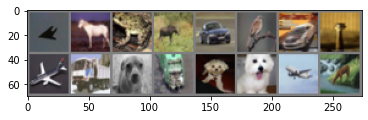

In [31]:
def imshow(img):
    """
    Display a PyTorch tensor as an image using matplotlib
    """
    # unnormalize the image 
    img = img / 2 + 0.5
    npimg = img.numpy()
    
    # transpose numpy array from CxHxW to HxWxC format and display image 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get a batch of random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# display the batch
imshow(torchvision.utils.make_grid(images))